# Tutorial: Plotting field slice

In this tutorial, we demonstrate different ways of setting the FD field values.

Firstly, we import the required Field class.

In [1]:
from discretisedfield import Mesh, Field
%matplotlib inline

We create a three-dimansional vector field with domain that spans between:

- minimum coordinate $c_{1} = (1, 1, 1)$ and
- maximum coordinate $c_{2} = (10, 6, 9)$,

with discretisation $d = (1, 1, 1)$.

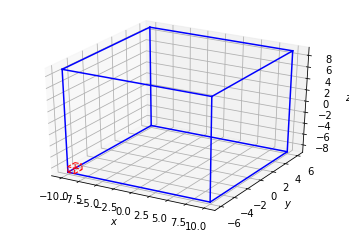

In [2]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
c1 = (-10, -6, -9)
c2 = (10, 6, 9)
cell = (1, 1, 1)
mesh = Mesh(c1, c2, cell=cell)
dim = 3
mesh.mpl()

After all the parameters are specified, we can create a field and give it a name.

In [3]:
field = Field(mesh, dim=dim, name='fdfield')

Now, we can set its value to be constant:

$$f(x, y, z) = (1, 3, 5)$$

In [4]:
value = (0, 0, 5)
field.value = value

After the field is set, we can plot its slice. Let's plot the slice perpendicular to the $x$ axis at the point $x=5$.

In [5]:
def value(pos):
    x, y, z = pos
    
    fx = x
    fy = y
    fz = 100*z
    
    return (fx, fy, fz)

field.value = value

In [6]:
def normfun(pos):
    x, y, z = pos
    if x**2 + y**2 <= 25:
        return 1
    else:
        return 0
    
#field.norm = normfun

Now, we can plot the 'z' slice at point 5:

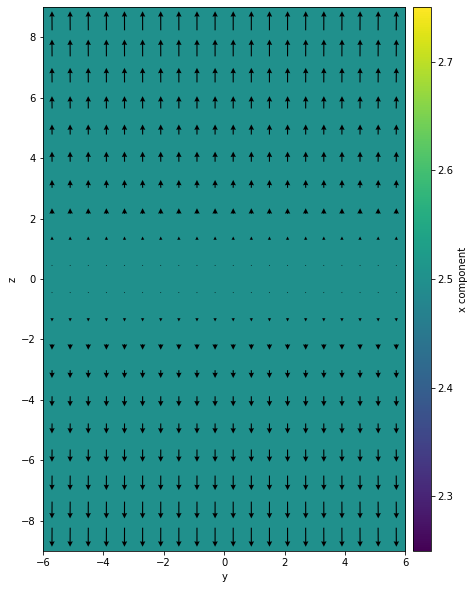

In [7]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
field.plane(x=2, n=(20, 20)).mpl(figsize=(10, 10))

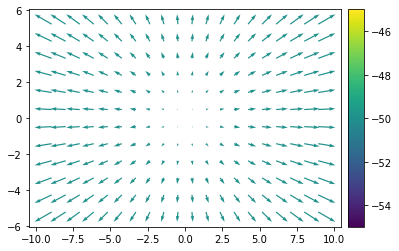

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
q = field.plane('z').quiver(ax, color_field=field.z)
cbar = field.colorbar(ax, q)

We can now see that $y-z$ slice is plotted, and colours correspond to the field's $x$-compoenent.

In [9]:
field.norm.k3d_nonzero()

Output()

In [10]:
field.value = (1000, 1000, 0)
field.z.plane(y=3).k3d_voxels(norm=field.norm)

Output()

In [11]:
field.value = (1000, 1000, 0)
field.norm = normfun
field.plane('z').k3d_vectors(points=True, color_field=field.z)

Output()

In [12]:
import numpy as np

In [13]:
np.nan

nan

In [14]:
import discretisedfield as df

a, b, c = 5e-9, 3e-9, 2e-9
cell = (0.5e-9, 0.5e-9, 0.5e-9)

mesh =  df.Mesh(p1=(-a, -b, -c), p2=(a, b, c), cell=cell)

def norm_fun(pos):
    x, y, z = pos
    if (x/a)**2 + (y/b)**2 + (z/c)**2 <= 1:
        return 1e6
    else:
        return 0
    
def value_fun(pos):
    x, y, z = pos
    c = 1e9
    return (-c*y, c*x, c*z)

field = df.Field(mesh, value=value_fun, norm=norm_fun)

field.norm.k3d_nonzero()

Output()